In [48]:
import torch
import torchio as tio
import torchio.transforms as transforms

In [47]:
# Load an image
img = tio.Subject(
    t1=tio.ScalarImage('.'),  # image (e.g. NIfTI image) directory
)

In [10]:
# Define transformations

motion = transforms.RandomMotion(degrees=10, translation=10, num_transforms=2, image_interpolation='linear')  # Add random MRI motion artifact 
ghosting = transforms.RandomGhosting(num_ghosts=(4,10), axes=(0,1,2), intensity=(0.5,1), restore=0.02)  # Add random MRI ghosting artifact 
spike = transforms.RandomSpike(num_spikes=1, intensity=(1,3))  # ADd random MRI spike artifacts
bias_field = transforms.RandomBiasField(coefficients=0.5, order=3)  # Add random bias field artifact
noise = transforms.RandomNoise(mean=0, std=(0,0.25))  # Gaussian noise with random parameters
swap = transforms.RandomSwap(patch_size=15, num_iterations=100)  # Randomly swap pathces within an image
blur = transforms.RandomBlur(std=(0,2))  # Blur an image using a random-size Gaussian Filter

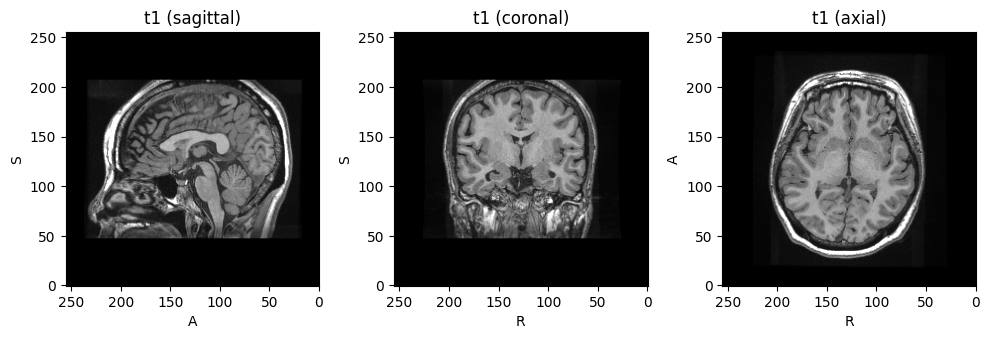

In [14]:
# Plot the original image
img.plot(figsize=(10,5))

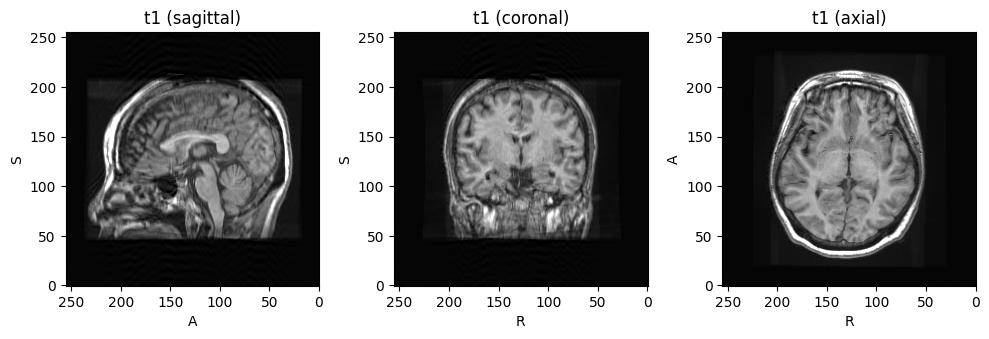

In [13]:
# Add random MRI motion artifact 

motion = transforms.RandomMotion(degrees=10, translation=10, num_transforms=2, image_interpolation='linear')  
tranformed_img = motion(img)
tranformed_img.plot(figsize=(10,5))

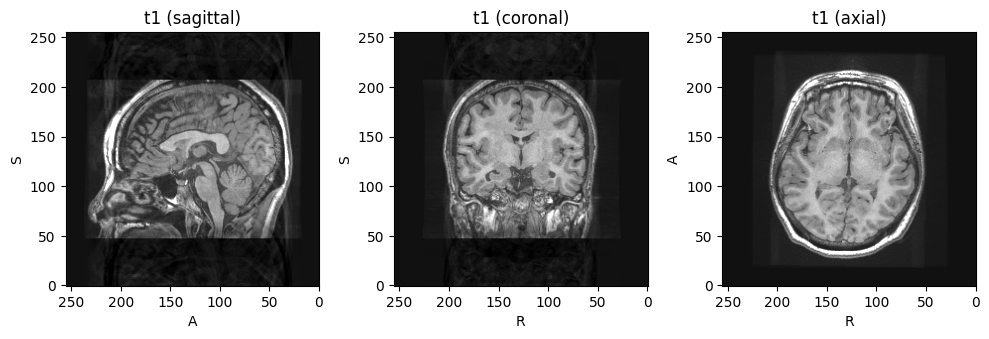

In [15]:
# Add random MRI ghosting artifact 

ghosting = transforms.RandomGhosting(num_ghosts=(4,10), axes=(0,1,2), intensity=(0.5,1), restore=0.02)  
tranformed_img = ghosting(img)
tranformed_img.plot(figsize=(10,5))

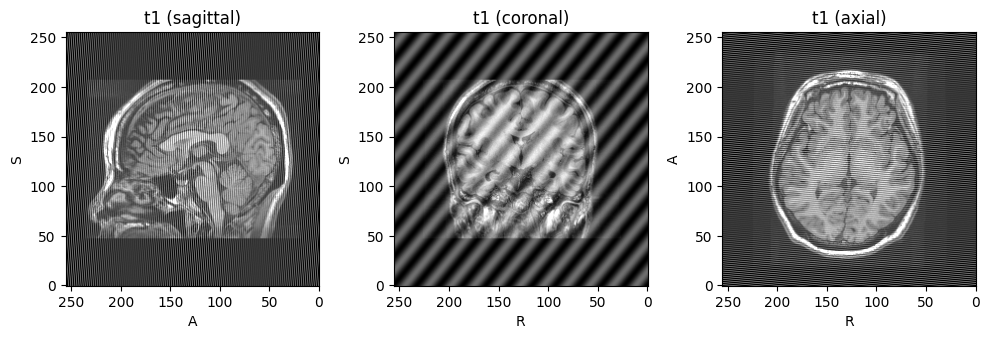

In [17]:
# Add random MRI spike artifacts

spike = transforms.RandomSpike(num_spikes=1, intensity=(1,3))  
tranformed_img = spike(img)
tranformed_img.plot(figsize=(10,5))

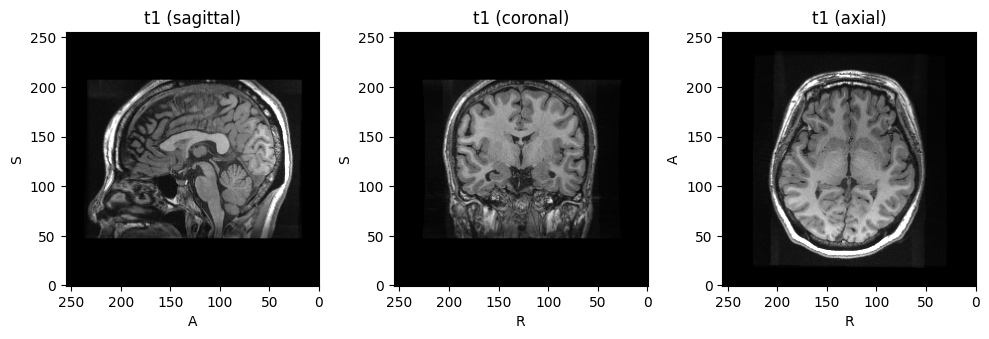

In [18]:
# Add random bias field artifact

bias_field = transforms.RandomBiasField(coefficients=0.5, order=3)  
tranformed_img = bias_field(img)
tranformed_img.plot(figsize=(10,5))

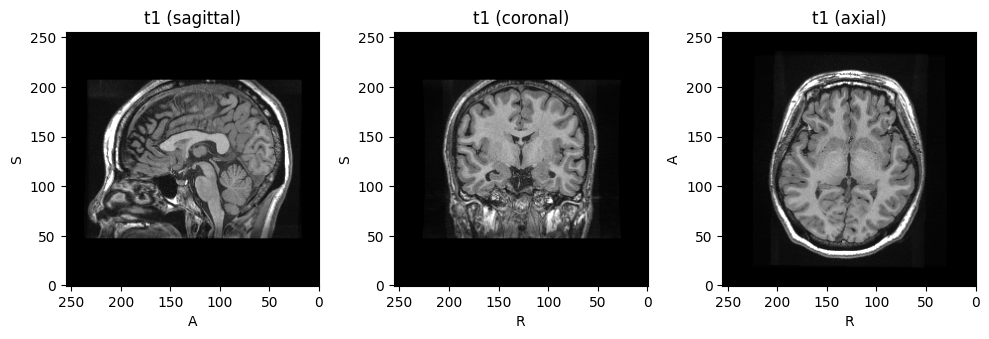

In [21]:
# Gaussian noise with random parameters

noise = transforms.RandomNoise(mean=0, std=(0,0.25))  
tranformed_img = noise(img)
tranformed_img.plot(figsize=(10,5))

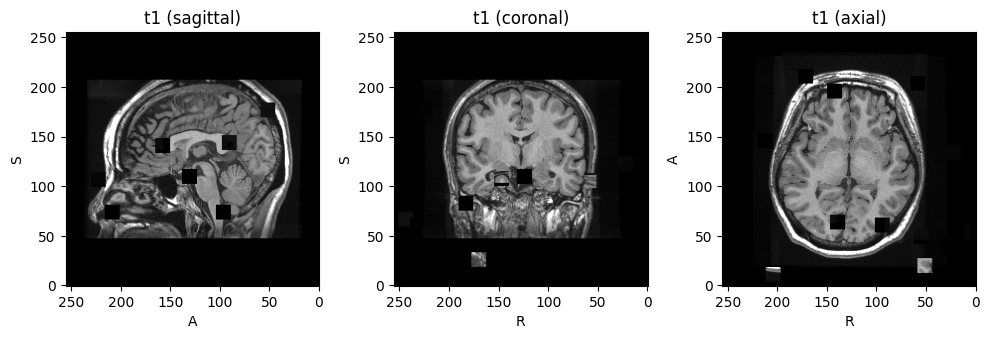

In [22]:
# Randomly swap pathces within an image

swap = transforms.RandomSwap(patch_size=15, num_iterations=100)  
tranformed_img = swap(img)
tranformed_img.plot(figsize=(10,5))

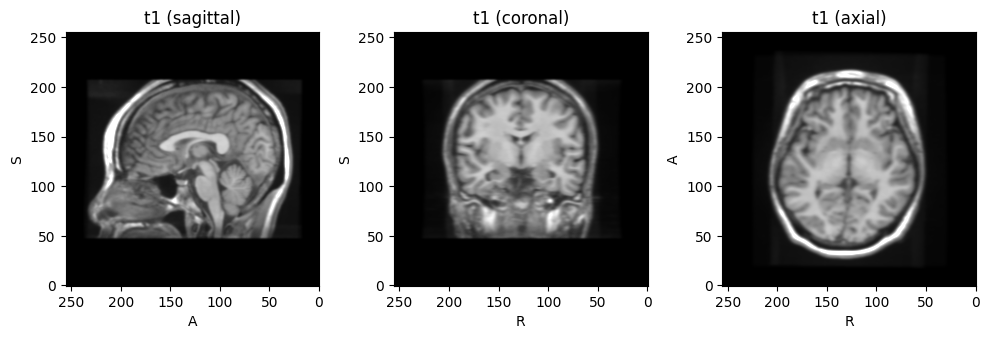

In [23]:
# Blur an image using a random-size Gaussian Filter

blur = transforms.RandomBlur(std=(0,2))  
tranformed_img = blur(img)
tranformed_img.plot(figsize=(10,5))

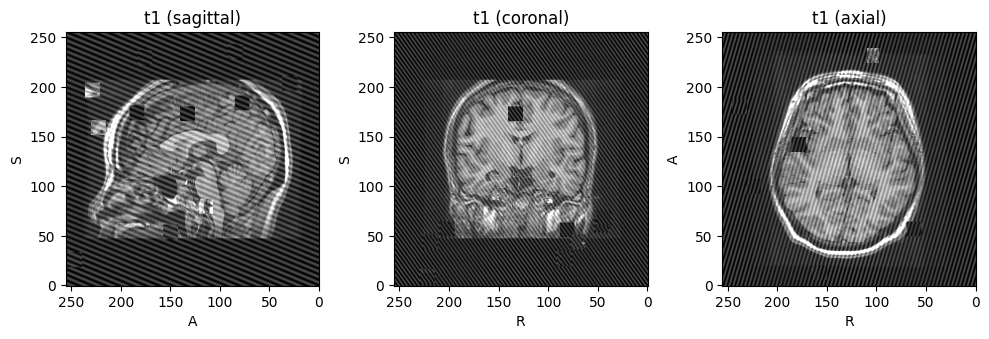

In [35]:
# Compose several transformations together

combi = tio.Compose([
    spike, swap
    ])
tranformed_img = combi(img)
tranformed_img.plot(figsize=(10,5))

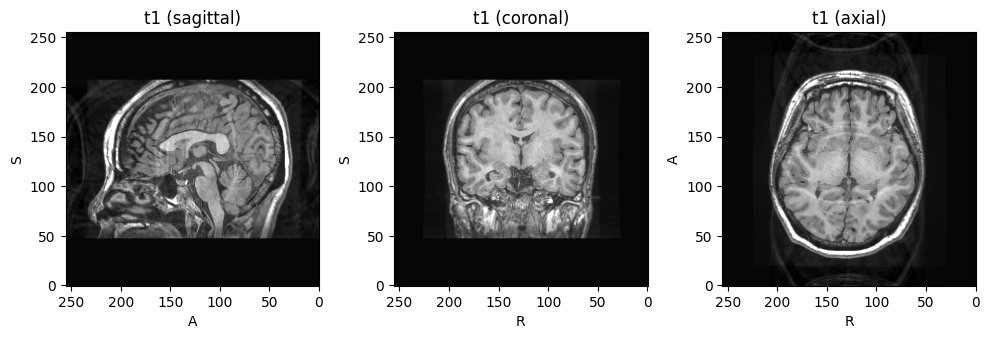

In [46]:
# Apply only one of the given transformations. 
## If a dictionary is given, the values are probabilities by which the key transform would be chosen. 
## If a sequence is given, the same proability will be assigned to each transform.  

transforms_dict = {
    combi: 0.2,
    blur: 0.3,
    ghosting: 0.5
    }  

oneof = tio.OneOf(transforms_dict)
tranformed_img = oneof(img)
tranformed_img.plot(figsize=(10,5))